In [28]:
# Imports
# P.S. These dependencies are not the same as the ones for the Python package.
# The ones required here are listed in the requirements-analysis.txt file.

# Builtins

# Third Party
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # handling data

# Custom
from shape_challenge.parsing import (
    parse_equipment_sensors_relationship, # handling equipment sensors relationship CSV file
    parse_failure_logs, # parse failure logs
)
from shape_challenge.transform import (
    filter_range, # filtering data by range
    merge_data, # merges data from the three data sources
)

In [5]:
# Load failure logs and filter for January 2020
dataframe_failure_logs = parse_failure_logs("../data/equipment_failure_sensors.log")
dataframe_failure_logs = filter_range(
    dataframe_failure_logs,
    "timestamp",
    "2020-01-01",
    "2020-01-31",
)

# Reset index
dataframe_failure_logs = dataframe_failure_logs.reset_index(drop=True)
dataframe_failure_logs.head()

,timestamp,message_level,sensor_id,temperature,vibration
0,2020-01-25 21:19:36,ERROR,1,339.17,742.92
1,2020-01-25 21:19:36,ERROR,10,45.59,5858.04
2,2020-01-25 21:19:36,ERROR,13,490.57,-3115.08
3,2020-01-25 21:19:36,ERROR,28,245.24,-4525.66
4,2020-01-25 21:19:36,ERROR,58,386.48,6893.01


In [6]:
# Load equipment list
dataframe_equipment = pd.read_json("../data/equipment.json")
dataframe_equipment

,equipment_id,code,group_name
0,1,5310B9D7,FGHQWR2Q
1,2,43B81579,VAPQY59S
2,3,E1AD07D4,FGHQWR2Q
3,4,ADE40E7F,9N127Z5P
4,5,78FFAD0C,9N127Z5P
5,6,9AD15F7E,PA92NCXZ
6,7,E54B5C3A,FGHQWR2Q
7,8,86083278,NQWPA8D3
8,9,3329175B,VAPQY59S
9,10,98B84035,NQWPA8D3


In [7]:
# Load relationship between sensors and equipment
dataframe_sensor_equipment = parse_equipment_sensors_relationship("../data/equipment_sensors.csv")
dataframe_sensor_equipment

,equipment_id,sensor_id
0,4,1
1,8,2
2,13,3
3,11,4
4,1,5
...,...,...
95,12,96
96,4,97
97,14,98
98,14,99


In [9]:
# Merge dataframes
dataframe = merge_data(
    dataframe_failure_logs,
    dataframe_equipment,
    dataframe_sensor_equipment,
)
dataframe

,timestamp,sensor_id,temperature,vibration,equipment_id,equipment_code,equipment_group_name
0,2020-01-25 21:19:36,1,339.17,742.92,4,ADE40E7F,9N127Z5P
1,2020-01-25 21:19:36,10,45.59,5858.04,4,ADE40E7F,9N127Z5P
2,2020-01-25 21:19:36,13,490.57,-3115.08,4,ADE40E7F,9N127Z5P
3,2020-01-25 21:19:36,28,245.24,-4525.66,4,ADE40E7F,9N127Z5P
4,2020-01-25 21:19:36,58,386.48,6893.01,4,ADE40E7F,9N127Z5P
...,...,...,...,...,...,...,...
11292,2020-01-12 15:59:09,47,349.57,4915.76,10,98B84035,NQWPA8D3
11293,2020-01-12 15:59:09,52,451.73,4797.32,10,98B84035,NQWPA8D3
11294,2020-01-12 15:59:09,74,497.56,7896.11,10,98B84035,NQWPA8D3
11295,2020-01-12 15:59:09,78,12.58,-6435.93,10,98B84035,NQWPA8D3


<AxesSubplot:xlabel='day_of_month'>

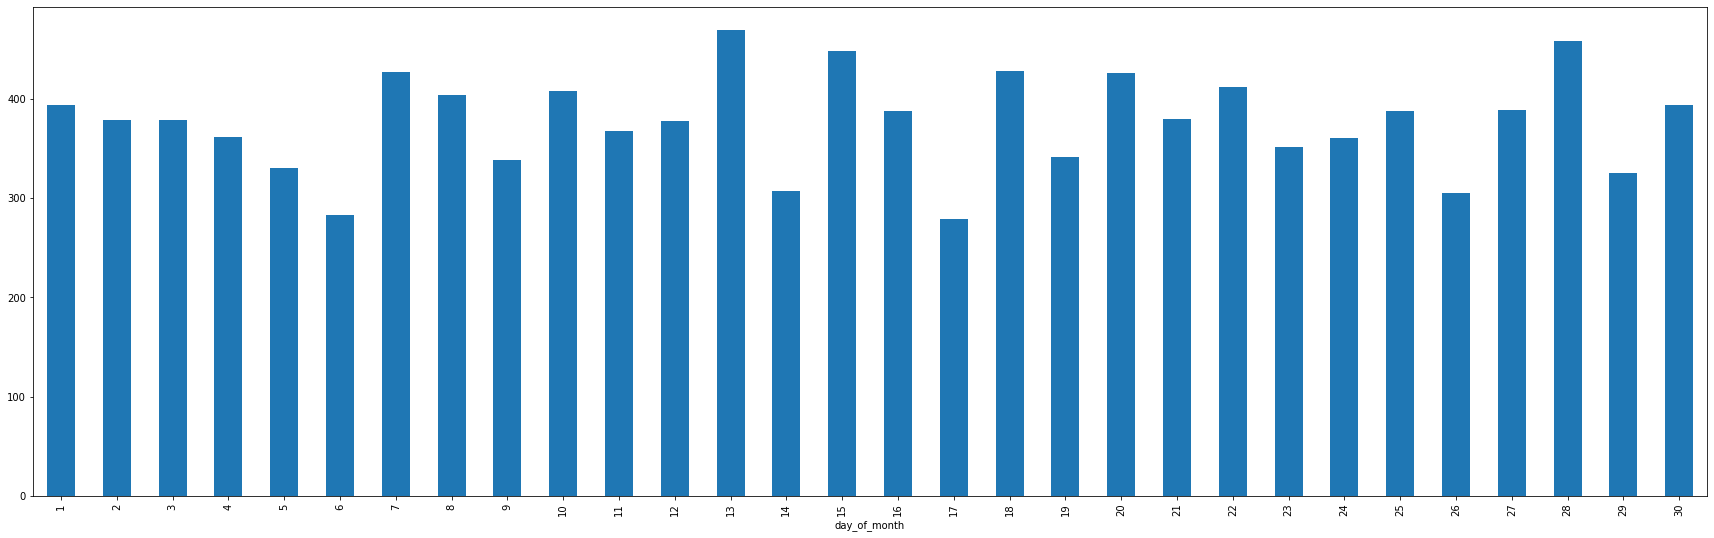

In [37]:
# Plots distribution of failures per day of the month
plot_df = dataframe
plot_df["day_of_month"] = plot_df["timestamp"].dt.day
plot_df["day_of_month"] = plot_df["day_of_month"].astype(int)
plot_df.groupby("day_of_month").count()["equipment_code"].plot.bar(figsize=(30,9))

<AxesSubplot:xlabel='hour_of_day'>

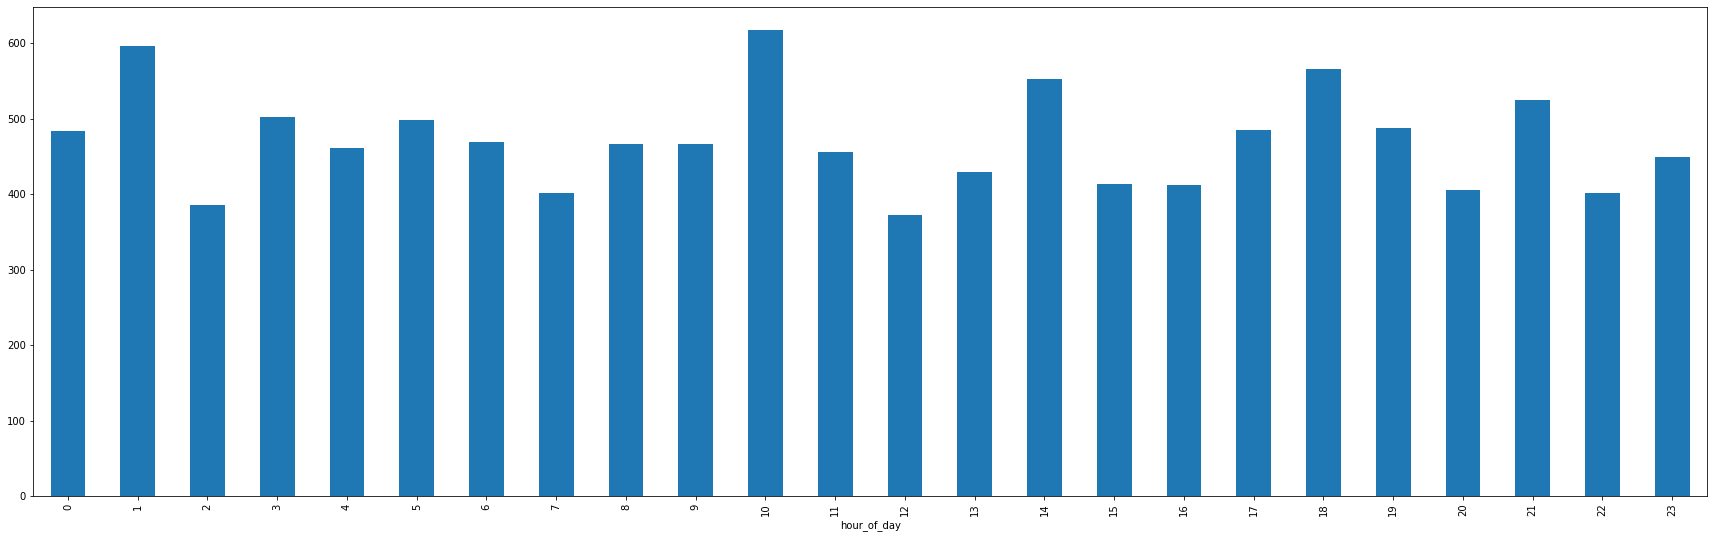

In [38]:
# Plots distribution of failures per hour of the day
plot_df = dataframe
plot_df["hour_of_day"] = plot_df["timestamp"].dt.hour
plot_df["hour_of_day"] = plot_df["hour_of_day"].astype(int)
plot_df.groupby("hour_of_day").count()["equipment_code"].plot.bar(figsize=(30,9))

# failures don't seem to be related to the hour of the day

<AxesSubplot:xlabel='weekday'>

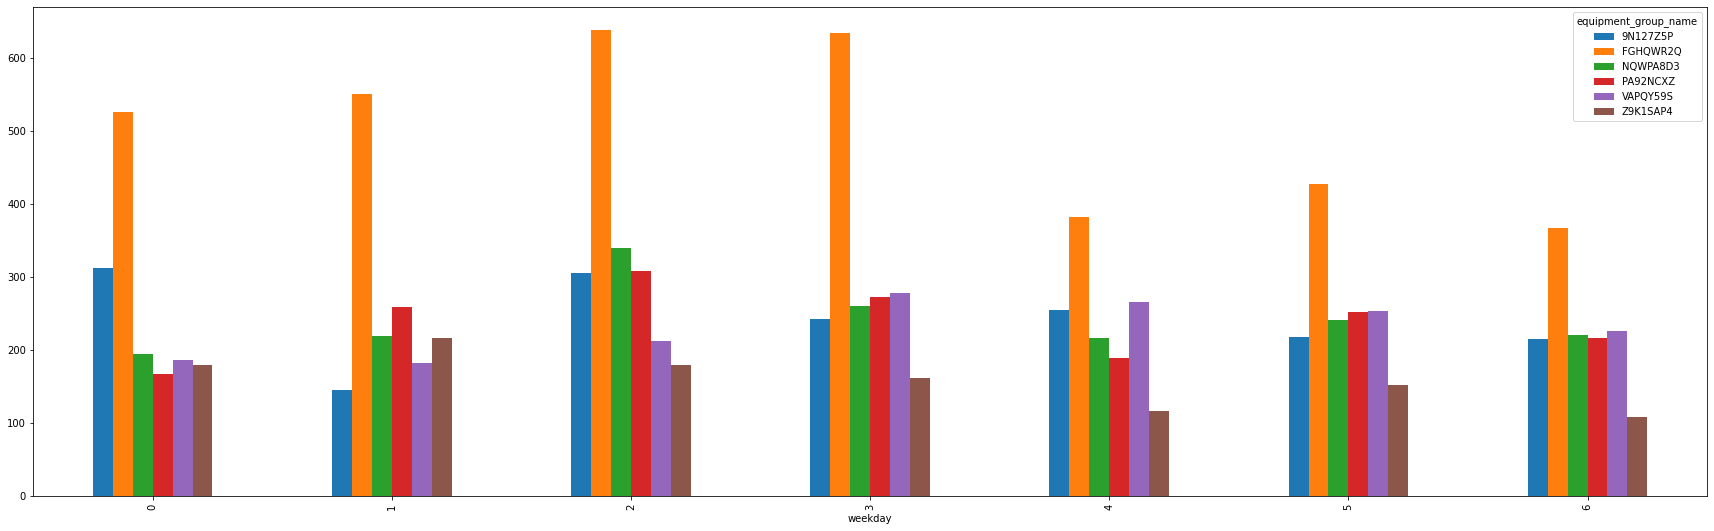

In [34]:
# Plots failure distributions vs. day of the week, split by equipment_group_name
plot_df = dataframe
plot_df["weekday"] = plot_df["timestamp"].dt.weekday
plot_df.groupby("equipment_group_name").weekday.value_counts().unstack(0).plot.bar(figsize=(30,9))

# failures don't seem to be related to the day of the week

In [43]:
# Get correlation between temperature and vibration
plot_df = dataframe
plot_df[["temperature", "vibration"]].corr()

# temperature and vibration don't seem to be related

,temperature,vibration
temperature,1.000000,-0.011071
vibration,-0.011071,1.000000


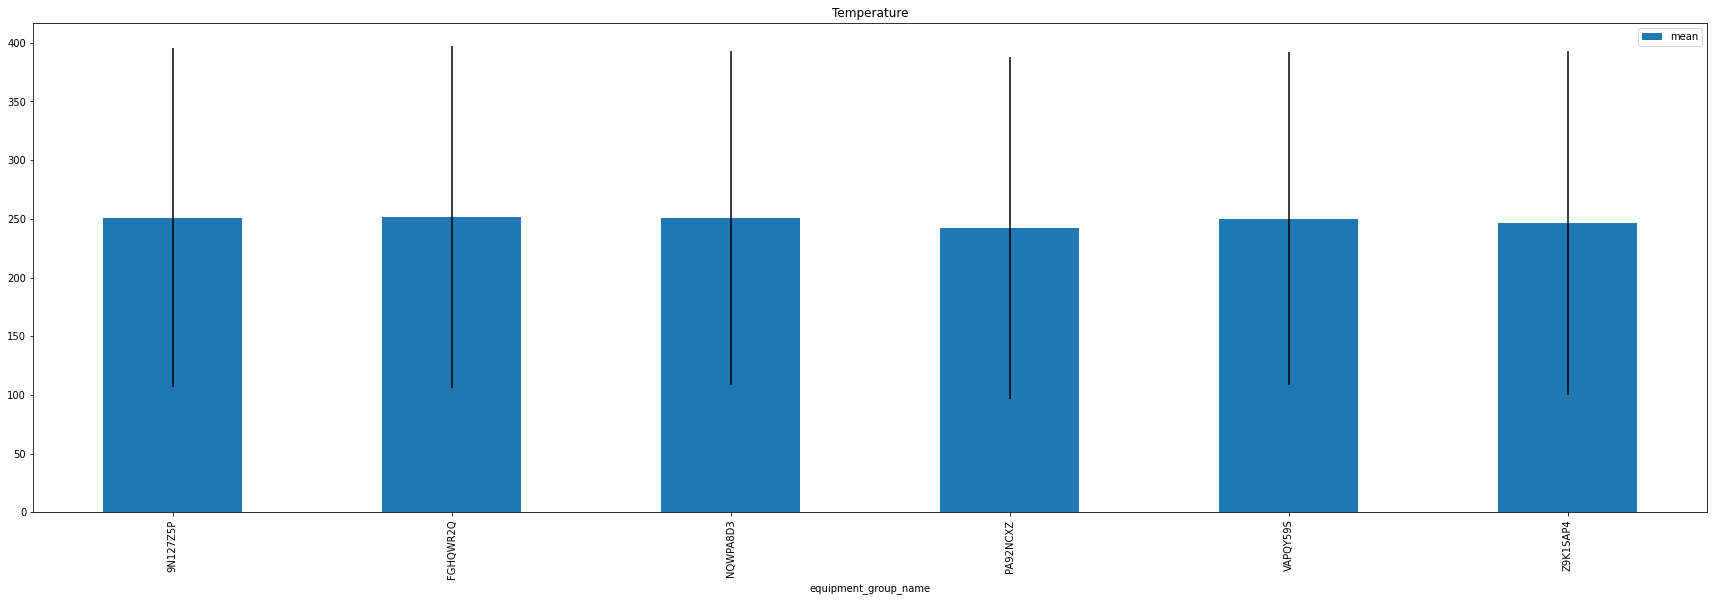

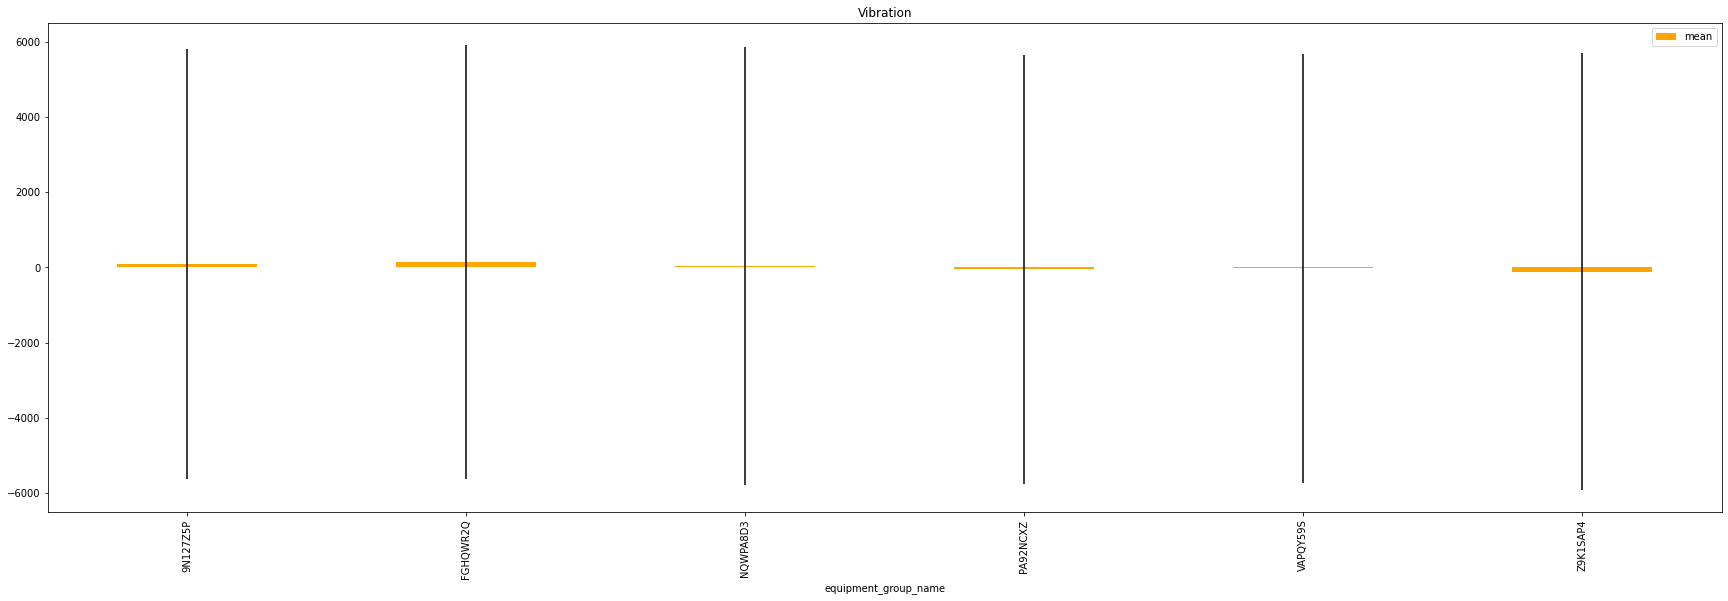

In [80]:
# Plot group average temperature and vibration
plot_df = dataframe
# Temperature
df = plot_df[["temperature", "equipment_group_name"]].groupby("equipment_group_name").agg([np.mean, np.std])
df.columns = ["mean", "std"]
df.plot(yerr=df["std"], y="mean", kind="bar", figsize=(30,9), title="Temperature")
plt.show()

# Vibration
df = plot_df[["vibration", "equipment_group_name"]].groupby("equipment_group_name").agg([np.mean, np.std])
df.columns = ["mean", "std"]
df.plot(yerr=df["std"], y="mean", kind="bar", figsize=(30,9), color="orange", title="Vibration")
plt.show()

# Both temperature and vibration seem to be similar in all groups

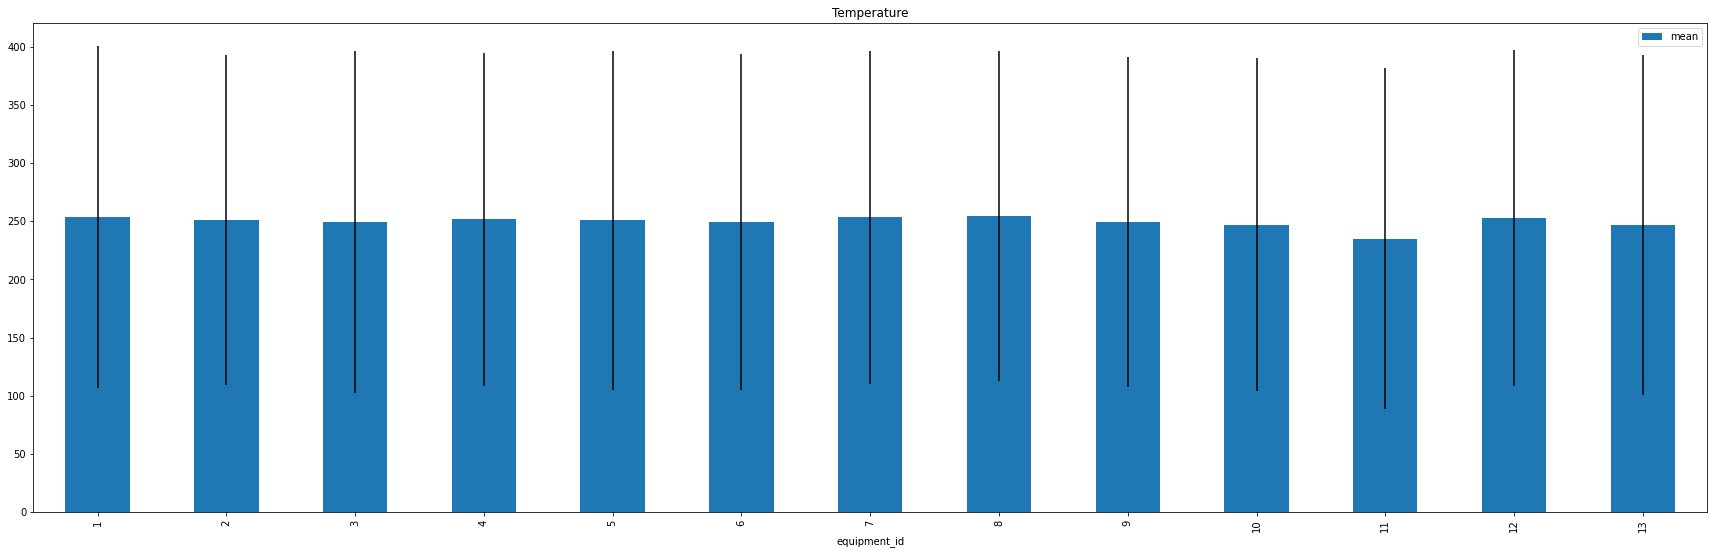

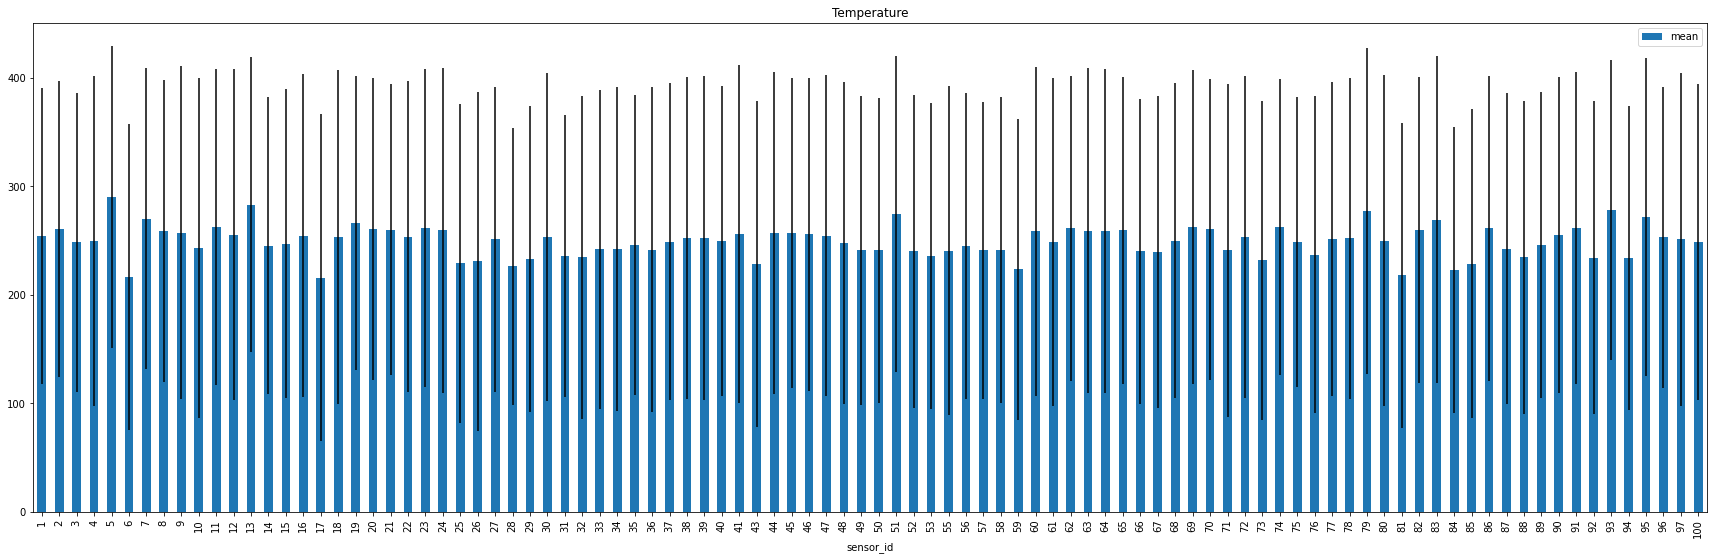

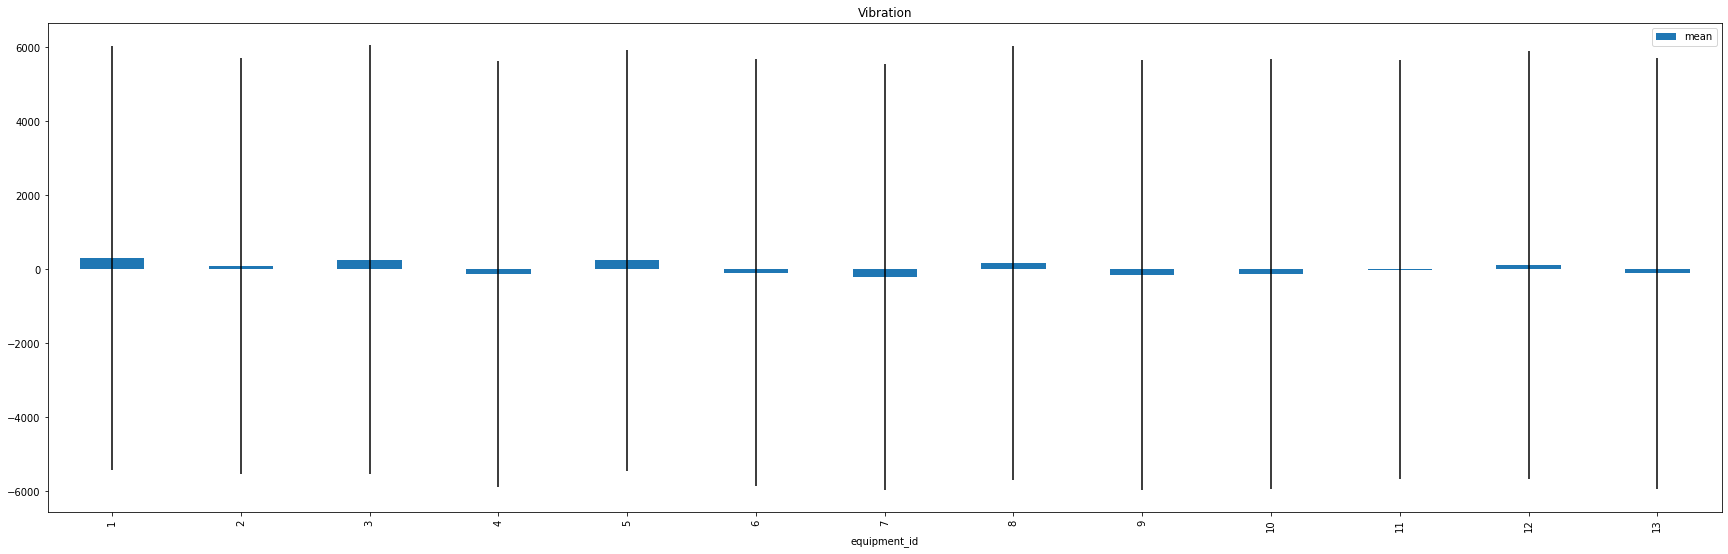

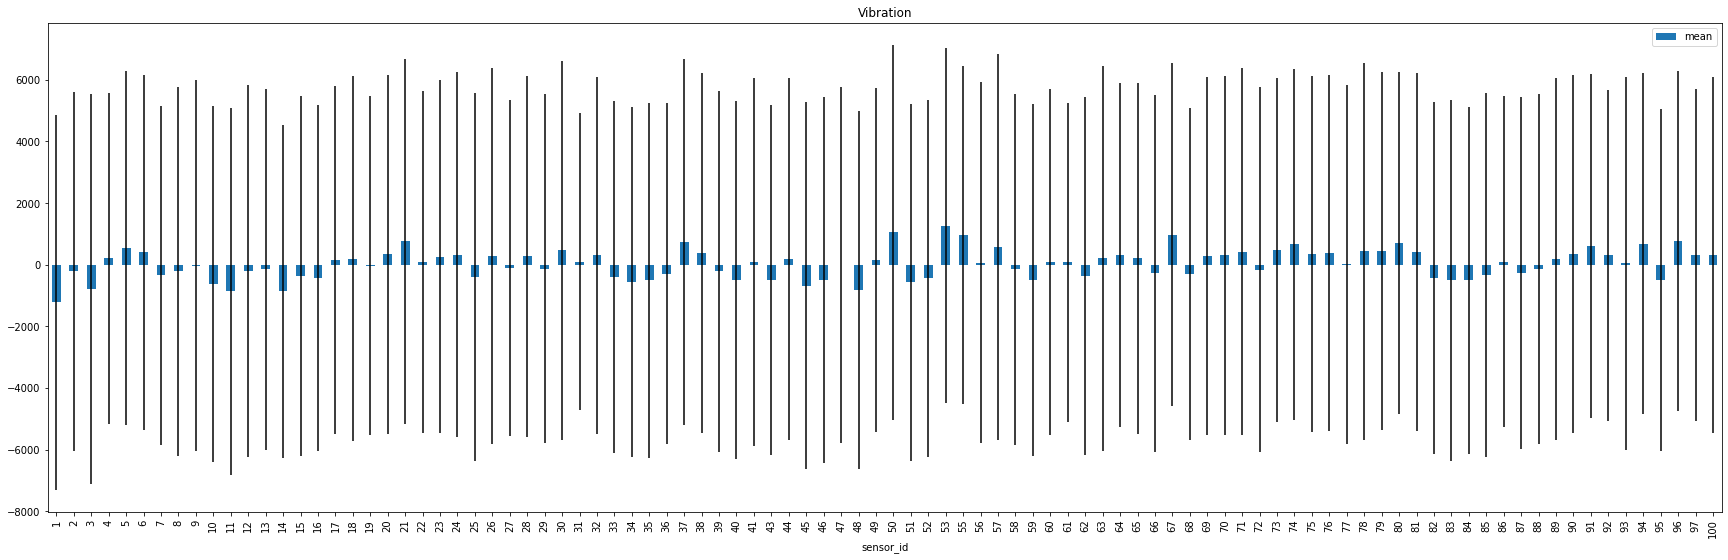

In [83]:
# Temperature
def plot_average_std_something_for_each_another_thing(
    something: str,
    another_thing: str,
) -> None:
    df = plot_df[[something, another_thing]].groupby(another_thing).agg([np.mean, np.std])
    df.columns = ["mean", "std"]
    df.plot(yerr=df["std"], y="mean", kind="bar", figsize=(30,9), title=something.capitalize())
    plt.show()

# I've also plotted average and std deviation of temperature and vibration for each equipment and
# each sensor.
# It all seems to be very similar. Vibration averages do seem to vary from sensor to sensor,
# but the standard deviations are too high to be useful.
plot_average_std_something_for_each_another_thing(
    something="temperature",
    another_thing="equipment_id",
)
plot_average_std_something_for_each_another_thing(
    something="temperature",
    another_thing="sensor_id",
)
plot_average_std_something_for_each_another_thing(
    something="vibration",
    another_thing="equipment_id",
)
plot_average_std_something_for_each_another_thing(
    something="vibration",
    another_thing="sensor_id",
)

<AxesSubplot:title={'center':'Temperature'}, xlabel='hour_of_day'>

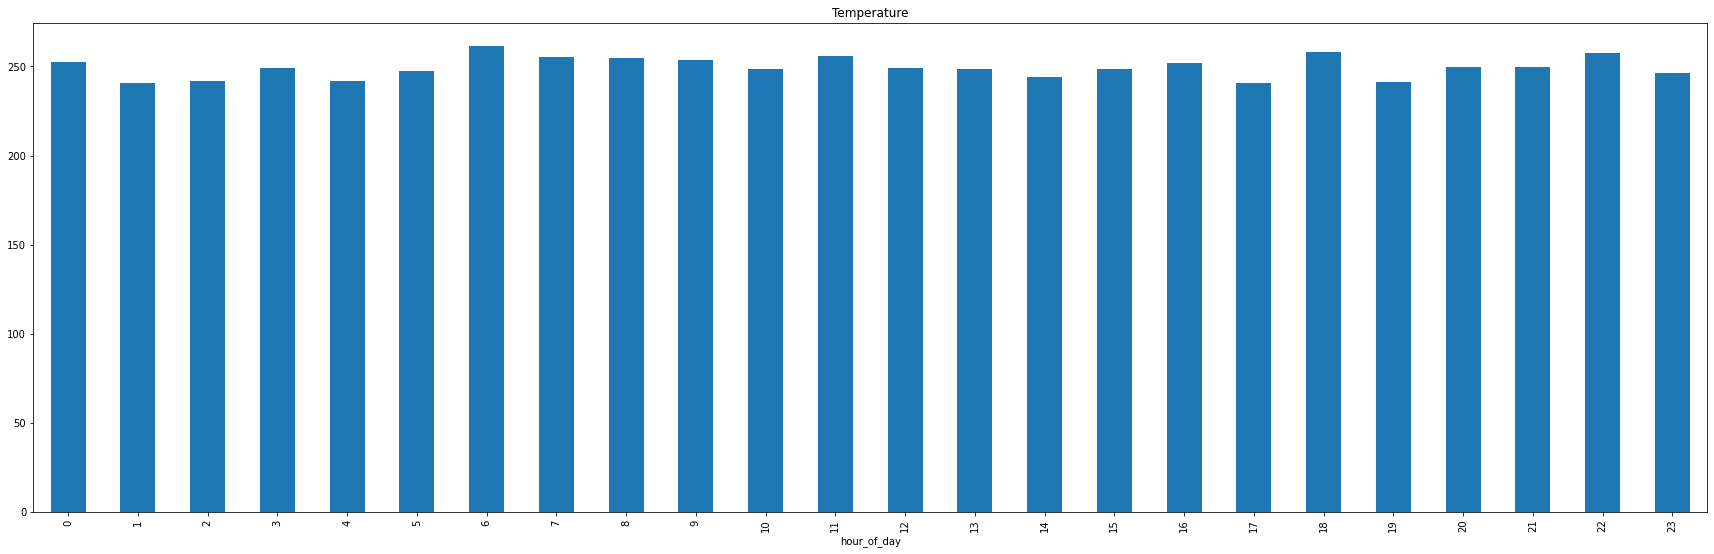

In [85]:
# Plot temperature against hour of the day
plot_df = dataframe
plot_df["hour_of_day"] = plot_df["timestamp"].dt.hour
plot_df["hour_of_day"] = plot_df["hour_of_day"].astype(int)
plot_df.groupby("hour_of_day").mean()["temperature"].plot.bar(figsize=(30,9), title="Temperature")

# I thought that maybe temperature would be related to the hour of the day, but it doesn't seem to be.

In [ ]:
# I can't seem to find any correlation between the columns.
# I'm assuming that this data is only useful for later stages of the project.
# Maybe if I had data of non-failure events, I could use it to rationalize the failure data.